In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Step 1: Load the dataset
df = pd.read_csv('international-airline-passengers.csv')

In [3]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
df = pd.read_csv('international-airline-passengers.csv', skiprows=1)  # Skips the top text row
df.columns = ['Month', 'Passengers']
df = df.dropna()  # Drop any rows with NaNs


In [6]:
df.head()

,Month,Passengers
0,1949-02,118.0
1,1949-03,132.0
2,1949-04,129.0
3,1949-05,121.0
4,1949-06,135.0


In [7]:
# Step 2: Clean and prepare data
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df = df.asfreq('MS')  # Ensure monthly start frequency
df['Passengers'] = df['Passengers'].astype(float)

In [12]:
df.head()

,Passengers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


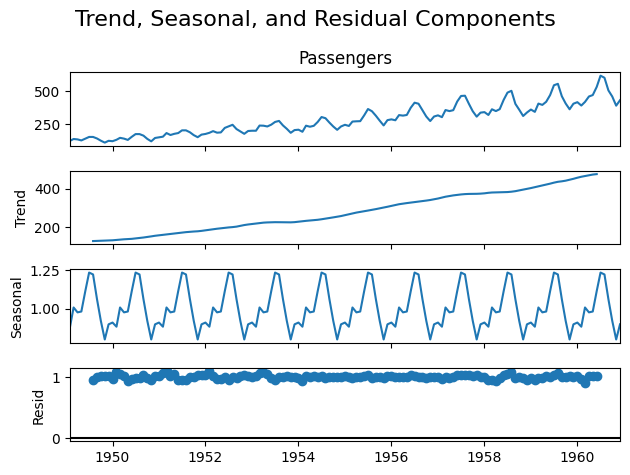

In [8]:
# Step 3: Seasonal decomposition
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')
decomposition.plot()
plt.suptitle("Trend, Seasonal, and Residual Components", fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
# Step 4: Forecasting using Exponential Smoothing
model = ExponentialSmoothing(df['Passengers'], trend='add', seasonal='mul', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(12)

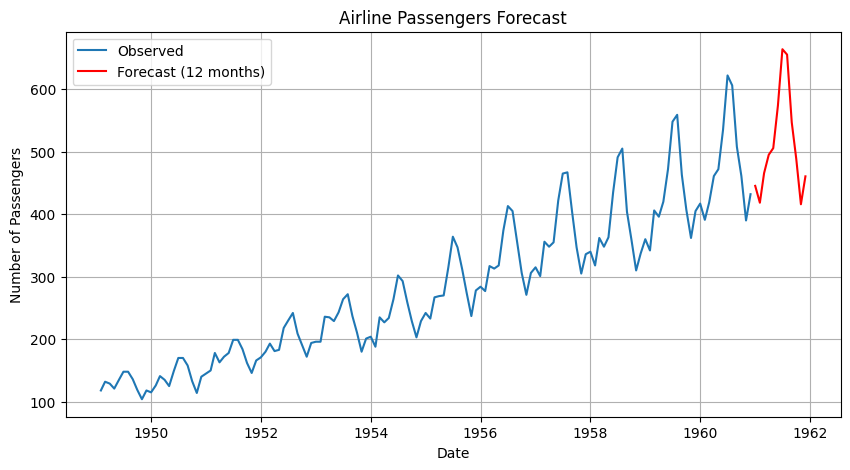

In [10]:
# Step 5: Plot actual data and forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Passengers'], label='Observed')
plt.plot(forecast, label='Forecast (12 months)', color='red')
plt.title('Airline Passengers Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()